***import necessary libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,124861.000000,124861.000000,124861.000000,124861.000000,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000,...,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000,124860.000000
mean,48422.610431,-0.252468,-0.002566,0.676188,0.151837,-0.282740,0.085256,-0.114835,0.061941,-0.084974,...,-0.036051,-0.115140,-0.034675,0.011196,0.130546,0.027544,0.000716,0.001964,93.538027,0.002074
std,19461.728774,1.832905,1.630974,1.285598,1.331903,1.324604,1.289583,1.182771,1.215421,1.093325,...,0.726140,0.636790,0.610243,0.594920,0.438954,0.491066,0.392830,0.315734,253.673232,0.045498
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,36261.000000,-1.021586,-0.580148,0.172435,-0.705937,-0.902402,-0.656952,-0.601469,-0.133742,-0.712045,...,-0.225777,-0.543657,-0.173617,-0.324893,-0.135225,-0.323414,-0.060772,-0.004380,6.700000,0.000000
50%,50262.000000,-0.263988,0.093240,0.751059,0.179923,-0.314970,-0.167807,-0.065286,0.077832,-0.146299,...,-0.059260,-0.092732,-0.046948,0.067950,0.166986,-0.063485,0.011034,0.023499,24.990000,0.000000
75%,64524.000000,1.156211,0.760756,1.371073,1.009207,0.241342,0.473973,0.411631,0.371205,0.496729,...,0.116543,0.304238,0.082856,0.408589,0.419010,0.293297,0.084994,0.077435,84.000000,0.000000
max,77449.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


Analyzing The Data

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('fraud cases : {}'.format(len(data[data['Class'] == 1])))
print('Valid cases : {}'.format(len(data[data['Class'] == 0])))

0.0020786350029293505
fraud cases : 259
Valid cases : 124601


In [ ]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,259.000000
mean,116.936293
std,247.227371
min,0.000000
25%,1.000000
50%,9.990000
75%,99.990000
max,1809.680000


In [ ]:
print('details of valid transaction')
valid.Amount.describe()

details of valid transaction


,Amount
count,124601.000000
mean,93.489391
std,253.685179
min,0.000000
25%,6.750000
50%,24.990000
75%,83.900000
max,19656.530000


<function matplotlib.pyplot.show(close=None, block=None)>

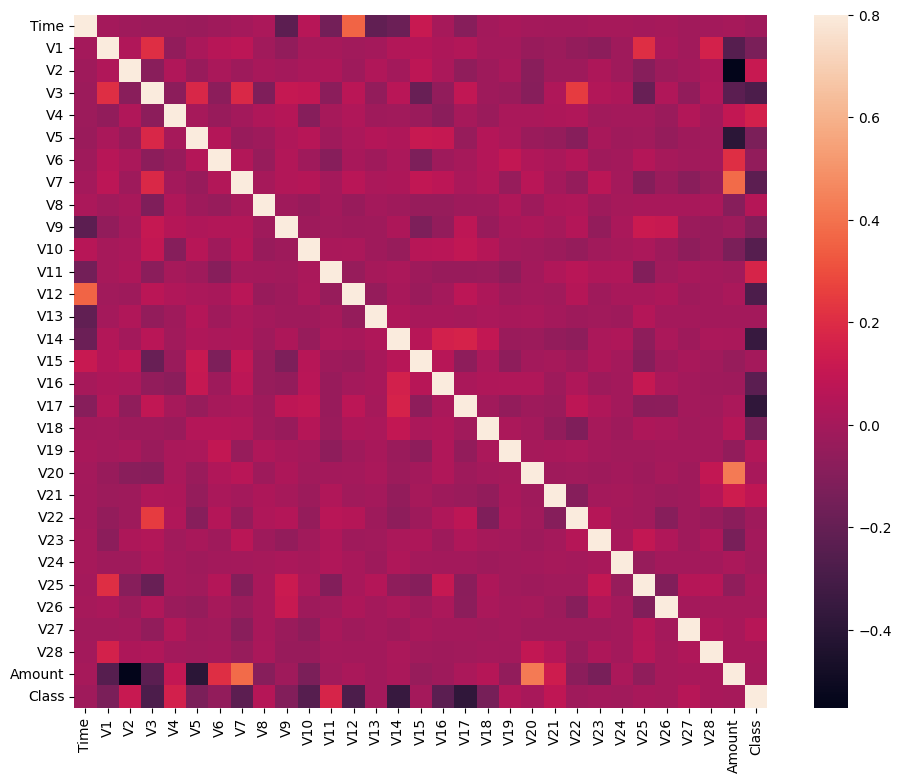

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show

In [ ]:
x = data.drop(['Class'], axis = 1)
y = data['Class']

print('x shape : ',x.shape)
print('y shape : ',y.shape )

x shape :  (124861, 30)
y shape :  (124861,)


In [ ]:
x_data = x.values
y_data = y.values

In [ ]:
from sklearn.model_selection import train_test_split

# Combine x_data and y_data to drop rows with NaN values together
data_combined = pd.DataFrame(x_data).copy()
data_combined['Class'] = y_data

# Drop rows with any NaN values
data_combined.dropna(inplace=True)

# Separate the features and target again
x_data_cleaned = data_combined.drop('Class', axis=1).values
y_data_cleaned = data_combined['Class'].values

# Split the cleaned data
x_train, x_test, y_train, y_test = train_test_split(x_data_cleaned, y_data_cleaned, test_size=0.2, random_state=42)

Logistic REgerssion

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(x_train,y_train)

y_pred = lg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
x_train_prediction = lg.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Logistics Model')
print('Accuracy : ', training_data_accuracy)

Logistics Model
Accuracy :  0.9988286881307064


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score =  f1_score(y_test,y_pred)
mcc =  matthews_corrcoef(y_test,y_pred)

print('Model Evaluation Metrics')
print('Logistics Model accuracy :', training_data_accuracy)
print('Random forest score : ', accuracy)
print('Precision score :', precision)
print('Recall score :',recall)
print('f1_score : ',f1_score)
print('MCC : ',mcc)

Model Evaluation Metrics
Logistics Model accuracy : 0.9988286881307064
Random forest score :  0.9993192375460516
Precision score : 0.9285714285714286
Recall score : 0.7358490566037735
f1_score :  0.8210526315789474
MCC :  0.826295016331906
